<a href="https://colab.research.google.com/github/pradeepdhayanandan/colab_projects/blob/main/Netflix_Business_Case_Study_Pradeep_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Netflix_Business_Case_Study_Pradeep_D**

# **Business Problem:**

### The content strategy team at Netflix wants to identify the characteristics of popular content across different countries and user segments so that it can provide better recommendations on the type of TV shows and movies to produce or acquire. The objective is to understand trends related to content type, genre, country of production, release timing, and viewer preferences to help Netflix grow its subscriber base and engagement in various global markets.

# **Installation of all packages and importing all the libraries**

In [ ]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# **Importing the files from the drive**

In [ ]:
!gdown 1lQ8JF1Xy87_Zxob_IgHzK8CYLi3LxxDl
data = pd.read_csv('netflix.csv')

Downloading...
From: https://drive.google.com/uc?id=1lQ8JF1Xy87_Zxob_IgHzK8CYLi3LxxDl
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 151MB/s]


In [ ]:
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# **Pre-Processing the Data**


# **Checking for Duplicates**

In [ ]:
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
data[data.duplicated()] #checking for duplicates and no duplicate rows are present

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


# **Unnesting the data in  'director', 'cast', 'country', 'listed_in' columns and stacking the values row-wise**

In [ ]:
data = pd.read_csv('netflix.csv')

In [ ]:
for col in ['cast', 'country', 'director', 'listed_in']:  # Applying the split at once for all these columns

  data[col] = data[col].apply(lambda x: re.split(r'\s*,\s*', x) if isinstance(x, str) else[] )

# Exploding one column at a time to avoid accidental row misalignment and to prevent from loss of data
data = data.explode('cast')
data['cast'] = data['cast'].str.strip()

data = data.explode('country')
data['country'] = data['country'].str.strip()

data = data.explode('director')
data['director'] = data['director'].str.strip()

data = data.explode('listed_in')
data['listed_in'] = data['listed_in'].str.strip()

In [ ]:
# creating the 'total mins' & 'No of seasons' columns from duration column:

data.loc[data['type'] == 'Movie', 'Total_mins'] = ( data.loc[data['type'] == 'Movie', 'duration'].apply(lambda x: int(x.split(" ")[0]) if pd.notnull(x) else None))
data.loc[data['type'] == 'TV Show', 'No_of_Seasons'] = (data.loc[data['type'] == 'TV Show', 'duration'].apply(lambda x: int(x.split(" ")[0]) if pd.notnull(x) else None))

In [ ]:
data = data.reset_index(drop = True)

In [ ]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Total_mins,No_of_Seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,NaN
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",NaN,2.0
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",NaN,2.0
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",NaN,2.0
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,111.0,NaN
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,111.0,NaN
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,111.0,NaN
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,111.0,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202065 entries, 0 to 202064
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   show_id        202065 non-null  object 
 1   type           202065 non-null  object 
 2   title          202065 non-null  object 
 3   director       151422 non-null  object 
 4   cast           199916 non-null  object 
 5   country        190168 non-null  object 
 6   date_added     201907 non-null  object 
 7   release_year   202065 non-null  int64  
 8   rating         201998 non-null  object 
 9   duration       202062 non-null  object 
 10  listed_in      202065 non-null  object 
 11  description    202065 non-null  object 
 12  Total_mins     145914 non-null  float64
 13  No_of_Seasons  56148 non-null   float64
dtypes: float64(2), int64(1), object(11)
memory usage: 21.6+ MB


# **NULL Value's Handling**

In [ ]:
data.isna().sum() # Null Values in columns

,0
show_id,0
type,0
title,0
director,50643
cast,2149
country,11897
date_added,158
release_year,0
rating,67
duration,3


In [ ]:
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Total_mins,No_of_Seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,NaN
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",NaN,2.0
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",NaN,2.0
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",NaN,2.0
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",NaN,2.0


In [ ]:
# Filling the Null values as Unknown(for categorical data) & (0 for Numerical data)
data.fillna({'director': 'Unknown director', 'cast': 'Unknown cast', 'country': 'Unknown country', 'date_added': 'Unknown date', 'rating': 'Unknown rating', 'duration': 'Unknown duration', 'Total_mins': '0.0', 'No_of_Seasons':'0.0'}, inplace = True)

In [ ]:
# Checking for any Null values in the columns
data.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [ ]:
#checking for blanks in dataframe
blank_mask = data.applymap(lambda x: isinstance(x, str) and x.strip() == '')
rows_with_blanks = data[blank_mask.any(axis=1)]
print(rows_with_blanks)

<ipython-input-325-984efa66e35d>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  blank_mask = data.applymap(lambda x: isinstance(x, str) and x.strip() == '')


       show_id     type          title          director  \
4737      s194  TV Show           D.P.  Unknown director   
4738      s194  TV Show           D.P.  Unknown director   
4741      s194  TV Show           D.P.  Unknown director   
4742      s194  TV Show           D.P.  Unknown director   
4745      s194  TV Show           D.P.  Unknown director   
...        ...      ...            ...               ...   
159311   s7008    Movie  Hotel Pacific   Janusz Majewski   
159312   s7008    Movie  Hotel Pacific   Janusz Majewski   
159316   s7008    Movie  Hotel Pacific   Janusz Majewski   
159317   s7008    Movie  Hotel Pacific   Janusz Majewski   
159318   s7008    Movie  Hotel Pacific   Janusz Majewski   

                         cast country       date_added  release_year rating  \
4737              Jung Hae-in          August 27, 2021          2021  TV-MA   
4738              Jung Hae-in          August 27, 2021          2021  TV-MA   
4741             Koo Kyo-hwan          Aug

In [ ]:
data[data['country'].str.strip() == ''] #Blank spaces are present in country column

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Total_mins,No_of_Seasons
4737,s194,TV Show,D.P.,Unknown director,Jung Hae-in,,"August 27, 2021",2021,TV-MA,1 Season,International TV Shows,A young private’s assignment to capture army d...,0.0,1.0
4738,s194,TV Show,D.P.,Unknown director,Jung Hae-in,,"August 27, 2021",2021,TV-MA,1 Season,TV Dramas,A young private’s assignment to capture army d...,0.0,1.0
4741,s194,TV Show,D.P.,Unknown director,Koo Kyo-hwan,,"August 27, 2021",2021,TV-MA,1 Season,International TV Shows,A young private’s assignment to capture army d...,0.0,1.0
4742,s194,TV Show,D.P.,Unknown director,Koo Kyo-hwan,,"August 27, 2021",2021,TV-MA,1 Season,TV Dramas,A young private’s assignment to capture army d...,0.0,1.0
4745,s194,TV Show,D.P.,Unknown director,Kim Sung-kyun,,"August 27, 2021",2021,TV-MA,1 Season,International TV Shows,A young private’s assignment to capture army d...,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159311,s7008,Movie,Hotel Pacific,Janusz Majewski,Joanna Kasperska,,"October 1, 2019",1975,TV-MA,96 min,Dramas,A motivated teen strives to rise from dishwash...,96.0,0.0
159312,s7008,Movie,Hotel Pacific,Janusz Majewski,Joanna Kasperska,,"October 1, 2019",1975,TV-MA,96 min,International Movies,A motivated teen strives to rise from dishwash...,96.0,0.0
159316,s7008,Movie,Hotel Pacific,Janusz Majewski,Jaroslava Schallerová,,"October 1, 2019",1975,TV-MA,96 min,Classic Movies,A motivated teen strives to rise from dishwash...,96.0,0.0
159317,s7008,Movie,Hotel Pacific,Janusz Majewski,Jaroslava Schallerová,,"October 1, 2019",1975,TV-MA,96 min,Dramas,A motivated teen strives to rise from dishwash...,96.0,0.0


In [ ]:
data['country'] = data['country'].apply(lambda x: 'Unknown country' if isinstance(x, str) and x.strip() == '' else x) #replacing blanks with Unknown country


In [ ]:
blank_mask = data.applymap(lambda x: isinstance(x, str) and x.strip() == '')
rows_with_blanks = data[blank_mask.any(axis=1)]
print(rows_with_blanks)
#Checking for blanks and no blanks are present in the dataframe

<ipython-input-328-efcaa607134a>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  blank_mask = data.applymap(lambda x: isinstance(x, str) and x.strip() == '')


Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description, Total_mins, No_of_Seasons]
Index: []


In [ ]:
data[data['duration'] == 'Unknown duration']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Total_mins,No_of_Seasons
126582,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,Unknown duration,Movies,"Louis C.K. muses on religion, eternal love, gi...",0.0,0.0
131648,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,Unknown duration,Movies,Emmy-winning comedy writer Louis C.K. brings h...,0.0,0.0
131782,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,Unknown duration,Movies,The comic puts his trademark hilarious/thought...,0.0,0.0


In [ ]:
#data has been misplaced in rating column instead of duration column - cleaning and putting the data in the appropriate columns
mask = ((data['type'] == 'Movie') & (data['duration'] == 'Unknown duration') & (data['rating'].str.contains('min', na=False)))


data.loc[mask, 'Total_mins'] = (data.loc[mask, 'rating'].str.extract(r'(\d+)')[0].astype(float))

data.loc[mask & data['Total_mins'].notna(), 'duration'] = (data.loc[mask & data['Total_mins'].notna(), 'Total_mins'].astype(int).astype(str) + ' min')

data.loc[mask, 'rating'] = 'Unknown rating'


In [ ]:
data[data['show_id'].isin(['s5542', 's5795', 's5814'])]  # The data is filled correctly

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Total_mins,No_of_Seasons
126582,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,Unknown rating,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi...",74.0,0.0
131648,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,Unknown rating,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...,84.0,0.0
131782,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,Unknown rating,66 min,Movies,The comic puts his trademark hilarious/thought...,66.0,0.0


In [ ]:
data[data['rating'] == 'Unknown rating']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Total_mins,No_of_Seasons
126582,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,Unknown rating,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi...",74.0,0.0
131648,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,Unknown rating,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...,84.0,0.0
131782,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,Unknown rating,66 min,Movies,The comic puts his trademark hilarious/thought...,66.0,0.0
135172,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,Unknown director,Oprah Winfrey,Unknown country,"January 26, 2017",2017,Unknown rating,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...,37.0,0.0
135173,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,Unknown director,Ava DuVernay,Unknown country,"January 26, 2017",2017,Unknown rating,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...,37.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172016,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,Francesco Migliore,Italy,"March 1, 2017",2015,Unknown rating,115 min,Dramas,"Amid the chaos and horror of World War II, a c...",115.0,0.0
172017,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,Albrecht Weimer,Italy,"March 1, 2017",2015,Unknown rating,115 min,Dramas,"Amid the chaos and horror of World War II, a c...",115.0,0.0
172018,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,Giulia Dichiaro,Italy,"March 1, 2017",2015,Unknown rating,115 min,Dramas,"Amid the chaos and horror of World War II, a c...",115.0,0.0
172019,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,Alessandra Oriti Niosi,Italy,"March 1, 2017",2015,Unknown rating,115 min,Dramas,"Amid the chaos and horror of World War II, a c...",115.0,0.0


In [ ]:
data = data.drop_duplicates()

In [ ]:
data[data.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Total_mins,No_of_Seasons


In [ ]:
data.shape

(202010, 14)

In [ ]:
data.to_csv('cleaned_data.csv', index = False)

In [ ]:
dff = data
print(f"Shape of the data is : {dff.shape}\n")
print(f"Data types of the attributes : {dff.dtypes}\n")
print(f"Total missing values: {dff.isnull().sum()}\n")
print(f"Statistical summary of data: {dff.describe()}\n")

Shape of the data is : (202010, 14)

Data types of the attributes : show_id          object
type             object
title            object
director         object
cast             object
country          object
date_added       object
release_year      int64
rating           object
duration         object
listed_in        object
description      object
Total_mins       object
No_of_Seasons    object
dtype: object

Total missing values: show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
Total_mins       0
No_of_Seasons    0
dtype: int64

Statistical summary of data:         release_year
count  202010.000000
mean     2013.448334
std         9.013446
min      1925.000000
25%      2012.000000
50%      2016.000000
75%      2019.000000
max      2021.000000



In [ ]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Total_mins,No_of_Seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,0.0
1,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",0.0,2.0
2,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",0.0,2.0
3,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",0.0,2.0
4,s2,TV Show,Blood & Water,Unknown director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,111.0,0.0
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,111.0,0.0
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,111.0,0.0
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,111.0,0.0


# **Outlier Detection**

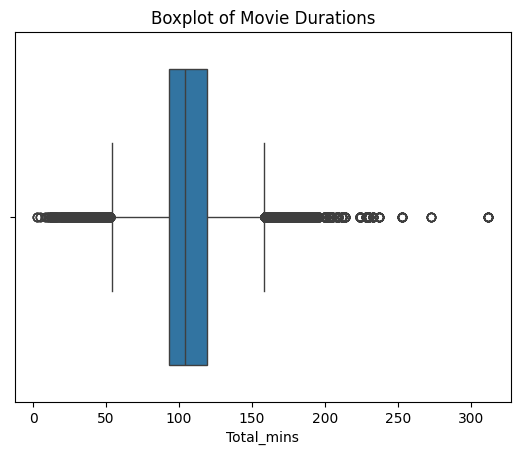

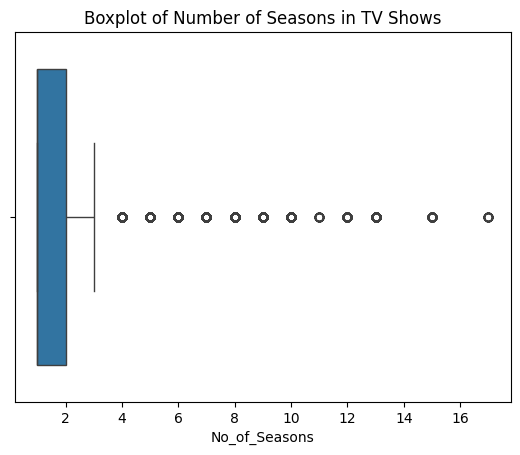

In [ ]:
movie_data = data[data['type'] == 'Movie']
tv_data = data[data['type'] == 'TV Show']

sns.boxplot(data=movie_data, x='Total_mins')
plt.title("Boxplot of Movie Durations")
plt.show()

sns.boxplot(data=tv_data, x='No_of_Seasons')
plt.title("Boxplot of Number of Seasons in TV Shows")
plt.show()

Insights:

**Movie Durations:**

* Most movies on Netflix have durations ranging from 80 to 120 minutes

* There are numerous outliers above 150 minutes, indicating the presence of longer feature films, documentaries, or specials.

* The median is around 95 - 100 minutes.

**Number of Seasons in TV Shows**
* A majority of Netflix TV shows are having only 1 or 2 seasons.

* A few shows exceed 5+ seasons, but these are outliers.

# **Shape of the data, D-Type of the attributes, Total missing values, Statistical Summary of the provided Netflix dataset(original)**

In [ ]:
df = pd.read_csv('netflix.csv')
print(f"Shape of the data is : {df.shape}\n")
print(f"Data types of the attributes : {df.dtypes}\n")
print(f"Total missing values: {df.isnull().sum()}\n")
print(f"Statistical summary of data: {df.describe()}\n")

Shape of the data is : (8807, 12)

Data types of the attributes : show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Total missing values: show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Statistical summary of data:        release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000



# **Finding the counts of each categorical variable both using graphical and non-graphical analysis.**

# **Non-Graphical Analysis/Value Counts for Categorical variables**

In [ ]:
val = pd.read_csv('cleaned_data.csv')
for column in val.columns:
  if val[column].dtype == 'object':
    print(f"\ncolumn:{column}")
    print("Value_Counts : ")
    print(val[column].value_counts())


column:show_id
Value_Counts : 
show_id
s7165    700
s6985    504
s7516    468
s2554    416
s5306    378
        ... 
s5079      1
s6044      1
s4515      1
s4506      1
s5062      1
Name: count, Length: 8807, dtype: int64

column:type
Value_Counts : 
type
Movie      145862
TV Show     56148
Name: count, dtype: int64

column:title
Value_Counts : 
title
Kahlil Gibran's The Prophet                       700
Holidays                                          504
Movie 43                                          468
The Eddy                                          416
Narcos                                            378
                                                 ... 
Katt Williams: Great America                        1
A Leaf of Faith                                     1
FIGHTWORLD                                          1
Ron White: If You Quit Listening, I'll Shut Up      1
Mau Nieto: Viviendo sobrio… desde el bar            1
Name: count, Length: 8807, dtype: int64

column:dir

# **Non-Graphical Analysis / unique attributes for Categorical variables**

In [ ]:
val = pd.read_csv('cleaned_data.csv')
for column in val.columns:
  if val[column].dtype == 'object':
    print(f"\n column:{column}")
    print(f"Unique_values {val[column].nunique()}:")
    print(val[column].unique())


 column:show_id
Unique_values 8807:
['s1' 's2' 's3' ... 's8805' 's8806' 's8807']

 column:type
Unique_values 2:
['Movie' 'TV Show']

 column:title
Unique_values 8807:
['Dick Johnson Is Dead' 'Blood & Water' 'Ganglands' ... 'Zombieland'
 'Zoom' 'Zubaan']

 column:director
Unique_values 4994:
['Kirsten Johnson' 'Unknown director' 'Julien Leclercq' ...
 'Majid Al Ansari' 'Peter Hewitt' 'Mozez Singh']

 column:cast
Unique_values 36440:
['Unknown cast' 'Ama Qamata' 'Khosi Ngema' ... 'Malkeet Rauni'
 'Anita Shabdish' 'Chittaranjan Tripathy']

 column:country
Unique_values 123:
['United States' 'South Africa' 'Unknown country' 'India' 'Ghana'
 'Burkina Faso' 'United Kingdom' 'Germany' 'Ethiopia' 'Czech Republic'
 'Mexico' 'Turkey' 'Australia' 'France' 'Finland' 'China' 'Canada' 'Japan'
 'Nigeria' 'Spain' 'Belgium' 'South Korea' 'Singapore' 'Italy' 'Romania'
 'Argentina' 'Venezuela' 'Hong Kong' 'Russia' 'Ireland' 'Nepal'
 'New Zealand' 'Brazil' 'Greece' 'Jordan' 'Colombia' 'Switzerland'
 'Isr

# **Graphical analysis of the categorical attributes**

# **Univariate Analysis**

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Total_mins,No_of_Seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,0.0
1,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",0.0,2.0
2,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",0.0,2.0
3,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",0.0,2.0
4,s2,TV Show,Blood & Water,Unknown director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",0.0,2.0


# **Distribution of Minutes attribute for Movies:**

# **Histogram**

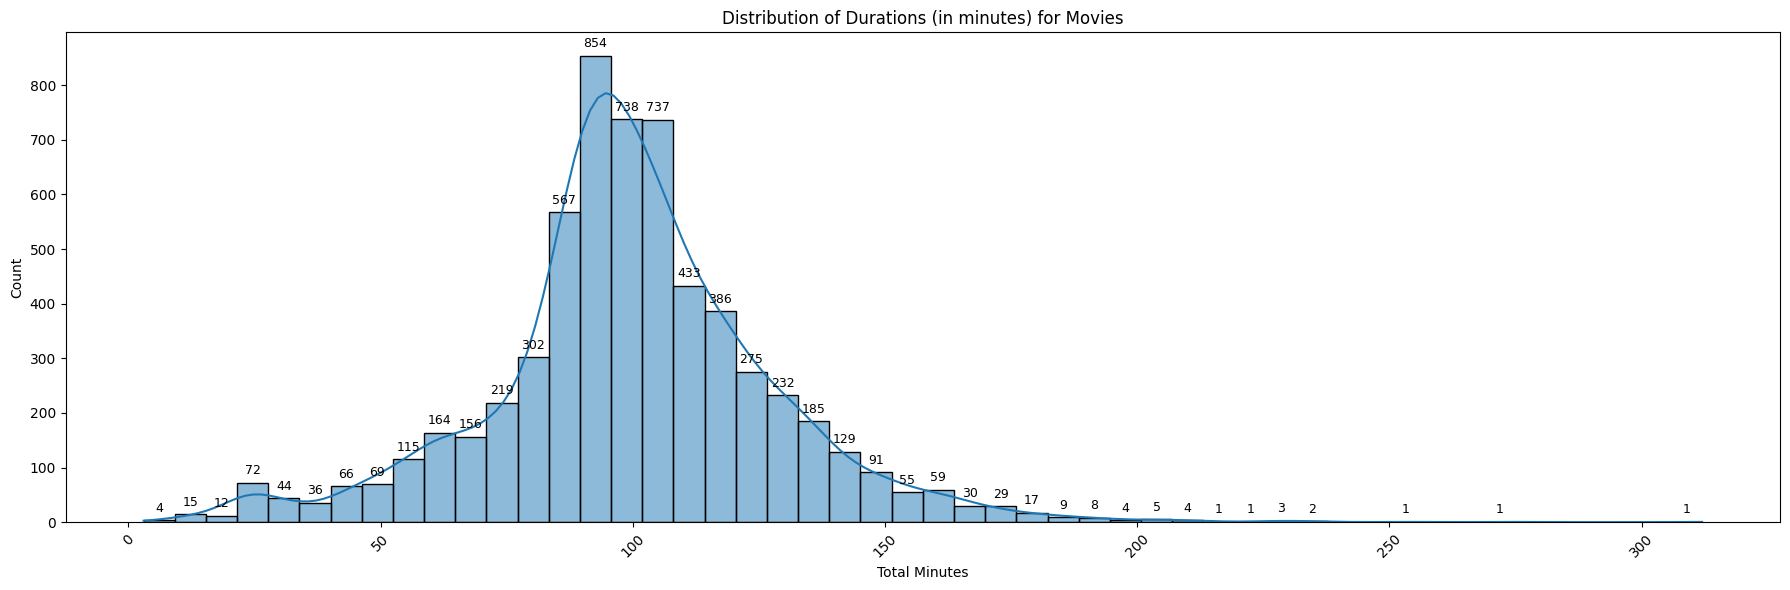

In [ ]:
#Distribution of Minutes attribute for movies:

movie_data = data[data['type'] == 'Movie']

# Keeping only the unique movie names for the correct analysis
movie_data = movie_data.drop_duplicates(subset='show_id')

#Histogram Plot
plt.figure(figsize=(18, 6))
ax = sns.histplot(data=movie_data, x='Total_mins', bins=50, kde=True)
for p in ax.patches:
  height = p.get_height()
  if height > 0:
      ax.text(
        p.get_x() + p.get_width() / 2,
        height + 10,
        int(height),
        ha = 'center',
        va = 'bottom',
        fontsize = 9
      )

plt.title('Distribution of Durations (in minutes) for Movies')
plt.xlabel('Total Minutes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# **Displot**

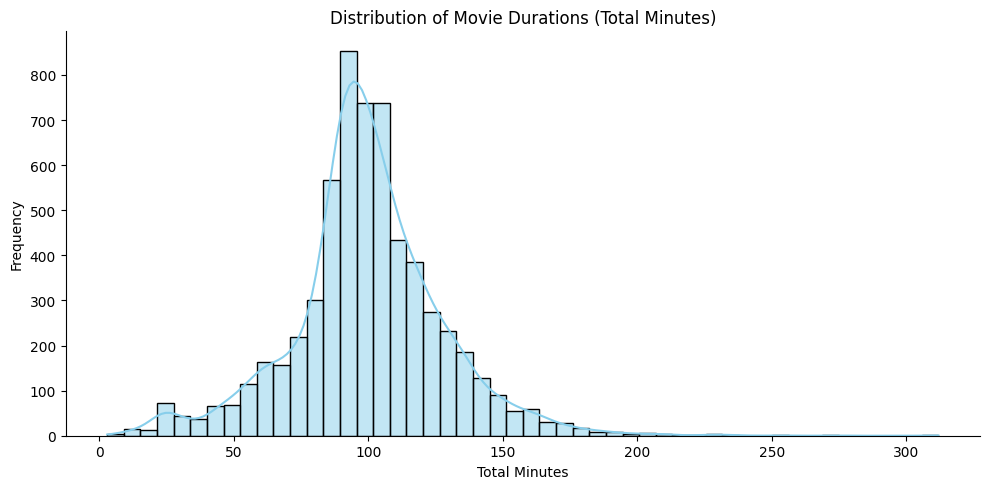

In [ ]:
# Plotting the displot
unique_data = data.drop_duplicates(subset='show_id')
movie_data = unique_data[unique_data['type'] == 'Movie']

ax = sns.displot(
    data=movie_data,
    x='Total_mins',
    bins=50,
    kde=True,
    aspect=2,
    height=5,
    color='skyblue'
)

plt.title('Distribution of Movie Durations (Total Minutes)')
plt.xlabel('Total Minutes')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Insights:

Total_mins of the Movie's typically shows a right-skewed distribution, with most movies clustering around 90-120 minutes, a standard for commercial films.

# **Frequency Distribution of Number of Seasons(TV Shows)**

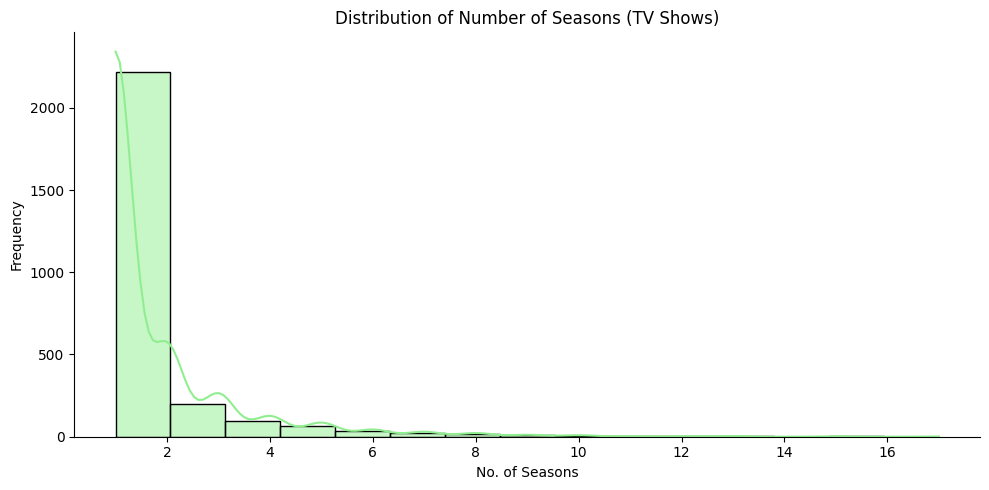

In [ ]:
tv_data = unique_data[unique_data['type'] == 'TV Show']

# Displot of No_of_Seasons
sns.displot(
    data=tv_data,
    x='No_of_Seasons',
    bins=15,
    kde=True,
    aspect=2,
    height=5,
    color='lightgreen'
)

plt.title('Distribution of Number of Seasons (TV Shows)')
plt.xlabel('No. of Seasons')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

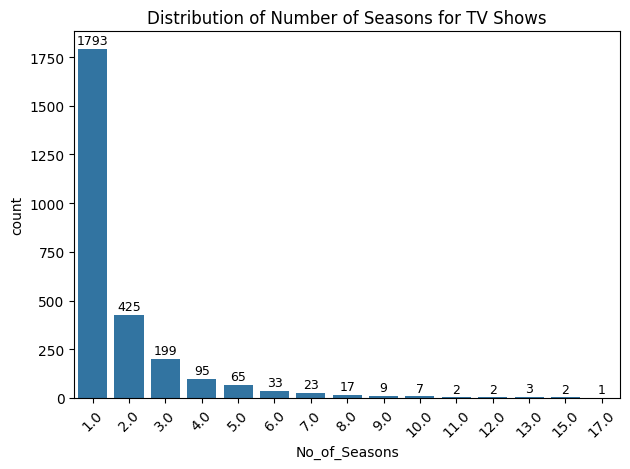

In [ ]:
tv_data = data[data['type'] == 'TV Show']

# Keeping only the unique TV show names for the correct analysis
tv_data = tv_data.drop_duplicates(subset='show_id')

ax = sns.countplot(data=tv_data, x='No_of_Seasons')
for p in ax.patches:
  height = p.get_height()
  if height > 0:
      ax.text(
        p.get_x() + p.get_width() / 2,
        height + 10,
        int(height),
        ha = 'center',
        va = 'bottom',
        fontsize = 9
      )
plt.xticks(rotation=45)
plt.title("Distribution of Number of Seasons for TV Shows")
plt.tight_layout()
plt.show()

Insights:
1. Majority of TV shows have 1 or 2 seasons, showing Netflix emphasis on mini-series or limited runs.

2. Very few of the TV season go beyond 5 seasons, making long-running shows the exception.

# **Movie Duration by Rating**

<ipython-input-348-7fa1fe6d09b5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Total_mins'] = pd.to_numeric(data['Total_mins'], errors='coerce')
<ipython-input-348-7fa1fe6d09b5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['No_of_Seasons'] = pd.to_numeric(data['No_of_Seasons'], errors='coerce')


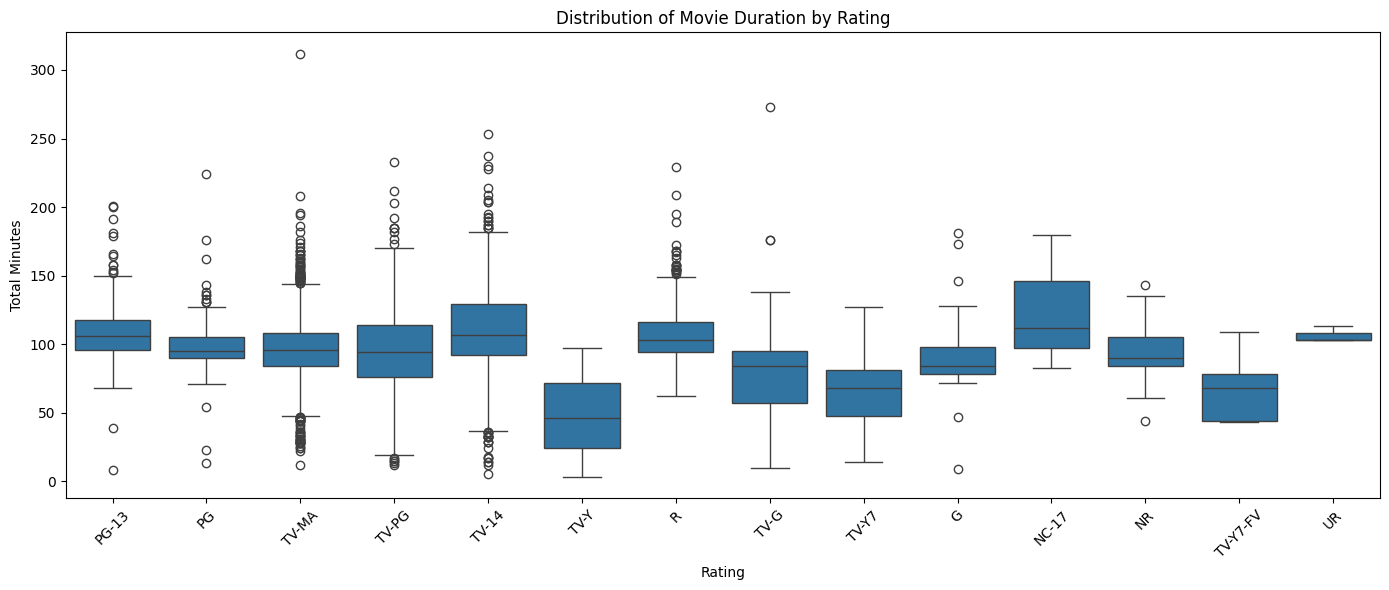

In [ ]:
# plotting the box plot for movie duration by rating

data['Total_mins'] = pd.to_numeric(data['Total_mins'], errors='coerce')
data['No_of_Seasons'] = pd.to_numeric(data['No_of_Seasons'], errors='coerce')

movie_data = data[data['type'] == 'Movie'].drop_duplicates(subset='show_id')

movie_data = movie_data[movie_data['rating'] != 'Unknown rating']


plt.figure(figsize=(14, 6))
sns.boxplot(data=movie_data, x='rating', y='Total_mins')
plt.xticks(rotation=45)
plt.title('Distribution of Movie Duration by Rating')
plt.xlabel('Rating')
plt.ylabel('Total Minutes')
plt.tight_layout()
plt.show()


Insights:
1.   TV-MA and R-rated movies tend to have a wider duration range, with medians around 100 - 110 minutes.
2.   Family-friendly ratings (e.g., TV-Y, PG, TV-G) show shorter durations and smaller variance.
3. Outliers exist in TV-MA, indicating some long-form content.



# **Correlation Heat Maps**

<ipython-input-349-853cec18b739>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_data['Total_mins'] = pd.to_numeric(unique_data['Total_mins'], errors='coerce')
<ipython-input-349-853cec18b739>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_data['No_of_Seasons'] = pd.to_numeric(unique_data['No_of_Seasons'], errors='coerce')


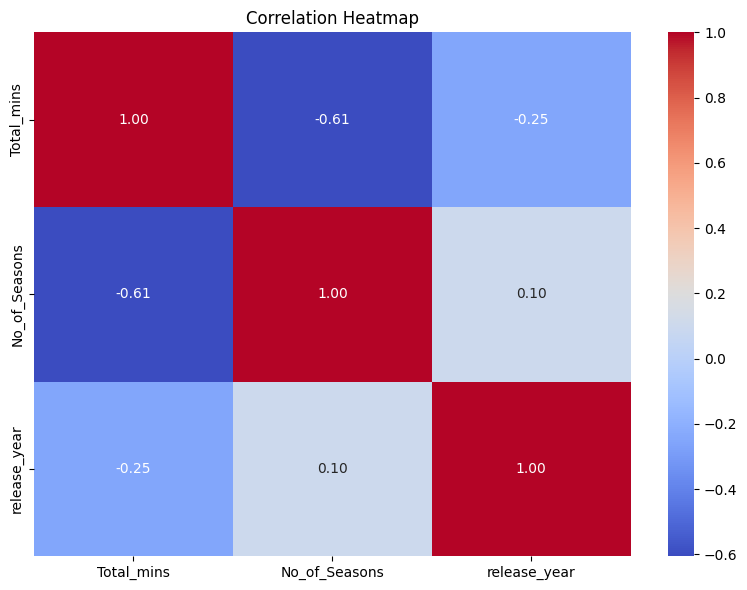

In [ ]:
#plotting the correlation heat maps for numerical data.
unique_data = data.drop_duplicates(subset='show_id')


unique_data['Total_mins'] = pd.to_numeric(unique_data['Total_mins'], errors='coerce')
unique_data['No_of_Seasons'] = pd.to_numeric(unique_data['No_of_Seasons'], errors='coerce')


corr_data = unique_data[['Total_mins', 'No_of_Seasons', 'release_year']]

plt.figure(figsize=(8, 6))
sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


Insights:
1. Strong Positive Correlation (1.00): total_mins with itself, no_of_seasons with itself, and release_year with itself.
2. Moderate Negative Correlation (-0.61): total_mins and no_of_seasons are negatively correlated, meaning shows with more seasons tend to have fewer total minutes per season.
3. Weak Negative Correlation (-0.25): total_mins and release_year show a slight negative correlation, suggesting newer shows might have slightly fewer total minutes.
4. Weak Positive Correlation (0.10): no_of_seasons and release_year have a slight positive correlation, indicating newer shows might have slightly more seasons.

# **Pair Plot**

<ipython-input-350-014a4c5dac45>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_data['Total_mins'] = pd.to_numeric(unique_data['Total_mins'], errors='coerce')
<ipython-input-350-014a4c5dac45>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_data['No_of_Seasons'] = pd.to_numeric(unique_data['No_of_Seasons'], errors='coerce')


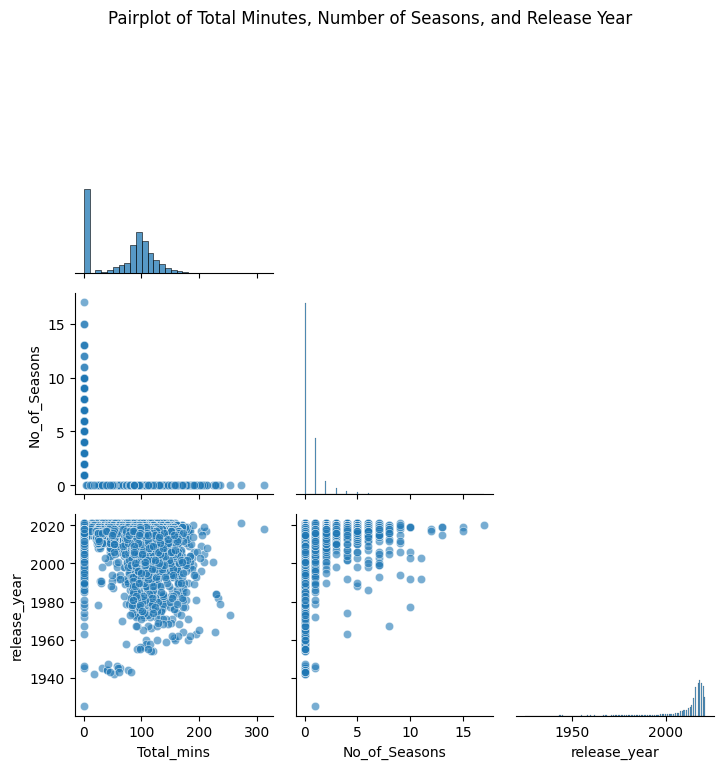

In [ ]:
unique_data = data.drop_duplicates(subset='show_id')

unique_data['Total_mins'] = pd.to_numeric(unique_data['Total_mins'], errors='coerce')
unique_data['No_of_Seasons'] = pd.to_numeric(unique_data['No_of_Seasons'], errors='coerce')

corr_columns = ['Total_mins', 'No_of_Seasons', 'release_year']
pair_data = unique_data[corr_columns].dropna()


sns.pairplot(pair_data, corner=True, kind='scatter', plot_kws={'alpha': 0.6})
plt.suptitle("Pairplot of Total Minutes, Number of Seasons, and Release Year", y=1.02)
plt.tight_layout()
plt.show()

Insights:

Pairplot shows low correlation between duration, seasons, and release year as expected due to their different nature (TV vs movies).


# **Number of Movies produced by each Country**

country
United States     2752
India              962
United Kingdom     534
Canada             319
France             303
                  ... 
Slovakia             1
Samoa                1
Uganda               1
Ukraine              1
Vatican City         1
Name: title, Length: 117, dtype: int64


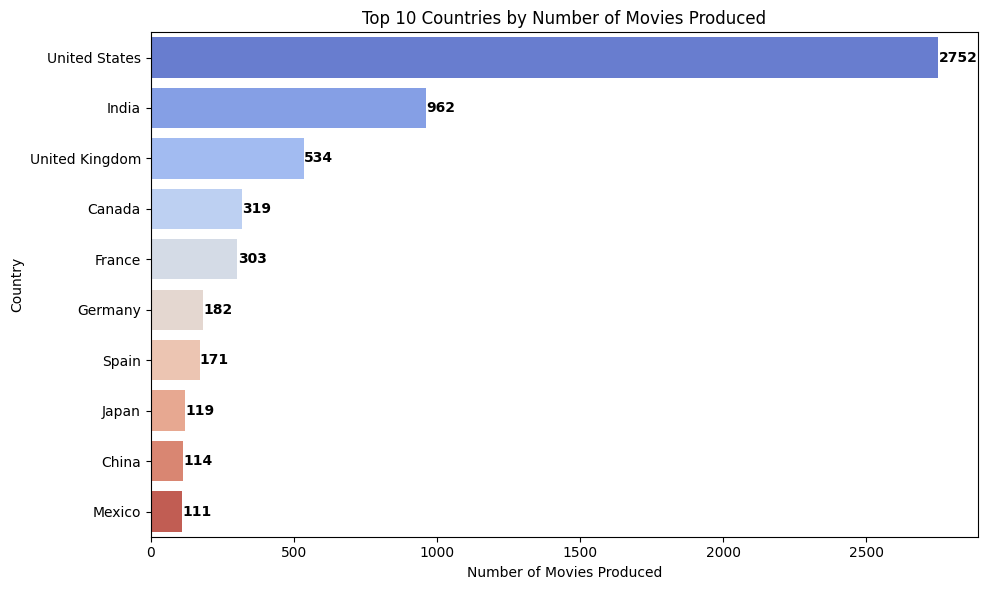

In [ ]:
movie_data = data[data['type'] == 'Movie']
movie_data = movie_data[movie_data['country'] != 'Unknown country']

# Keeping only the unique movie names for the correct analysis
movies_unique = movie_data.drop_duplicates(subset=['show_id', 'country'])

countries_prod = movies_unique.groupby('country')['title'].nunique().sort_values(ascending=False)

print(countries_prod)

top_10_countries = movies_unique.groupby('country')['title'].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
ax = sns.barplot(x=top_10_countries.values, y=top_10_countries.index, hue=top_10_countries.index, palette='coolwarm',legend=False)

for i, v in enumerate(top_10_countries.values):
    ax.text(v + 1, i, str(v), color='black', va='center', fontweight='bold')

plt.title('Top 10 Countries by Number of Movies Produced')
plt.xlabel('Number of Movies Produced')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


Insights:
1. Netflix has produced highest number of Movies(2752) for United States.
2. India is the second country for highest movies production by Netflix.
3. The above chart shows the Top 10 countries that the netflix has produced movies.


# **Number of TV Shows produced by each Country**

country
United States           938
United Kingdom          272
Japan                   199
South Korea             170
Canada                  126
                       ... 
Malta                     1
Syria                     1
Switzerland               1
United Arab Emirates      1
Uruguay                   1
Name: title, Length: 65, dtype: int64


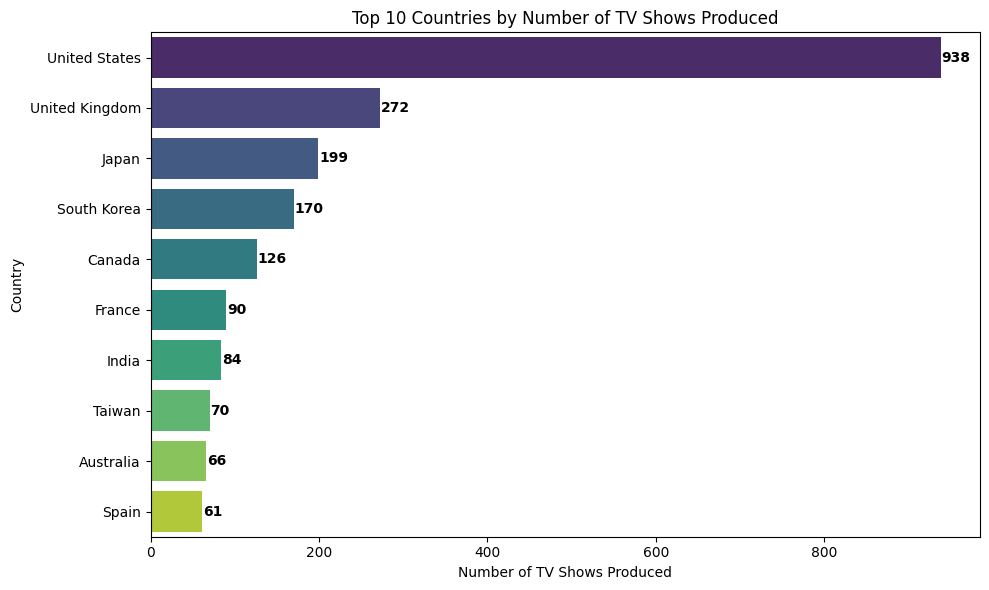

In [ ]:
tv_data = data[data['type'] == 'TV Show']
tv_data = tv_data[tv_data['country'] != 'Unknown country']

# Keeping only the unique TV show names for the correct analysis
tv_unique = tv_data.drop_duplicates(subset=['show_id', 'country'])

tv_countries = tv_unique.groupby('country')['title'].nunique().sort_values(ascending=False)

print(tv_countries)

top_10_tv_countries = tv_unique.groupby('country')['title'].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
ax = sns.barplot(x=top_10_tv_countries.values, y=top_10_tv_countries.index, hue=top_10_tv_countries.index, palette='viridis',legend=False)

for i, v in enumerate(top_10_tv_countries.values):
    ax.text(v + 1, i, str(v), color='black', va='center', fontweight='bold')

plt.title('Top 10 Countries by Number of TV Shows Produced')
plt.xlabel('Number of TV Shows Produced')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


Insights:
1. Netflix has produced highest number(938) of TV shows in United States.
2. UK stands in 2nd highest position in the production of TV shows by Netflix.
3. India Stands in 7th Position with 84 TV shows production by Netflix.


# **Best time to launch a TV show**

In [ ]:
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Total_mins,No_of_Seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,0.0
1,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",0.0,2.0
2,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",0.0,2.0
3,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",0.0,2.0
4,s2,TV Show,Blood & Water,Unknown director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",0.0,2.0


<ipython-input-354-66694c6da60c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')
<ipython-input-354-66694c6da60c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['week_added'] = data['date_added'].dt.isocalendar().week


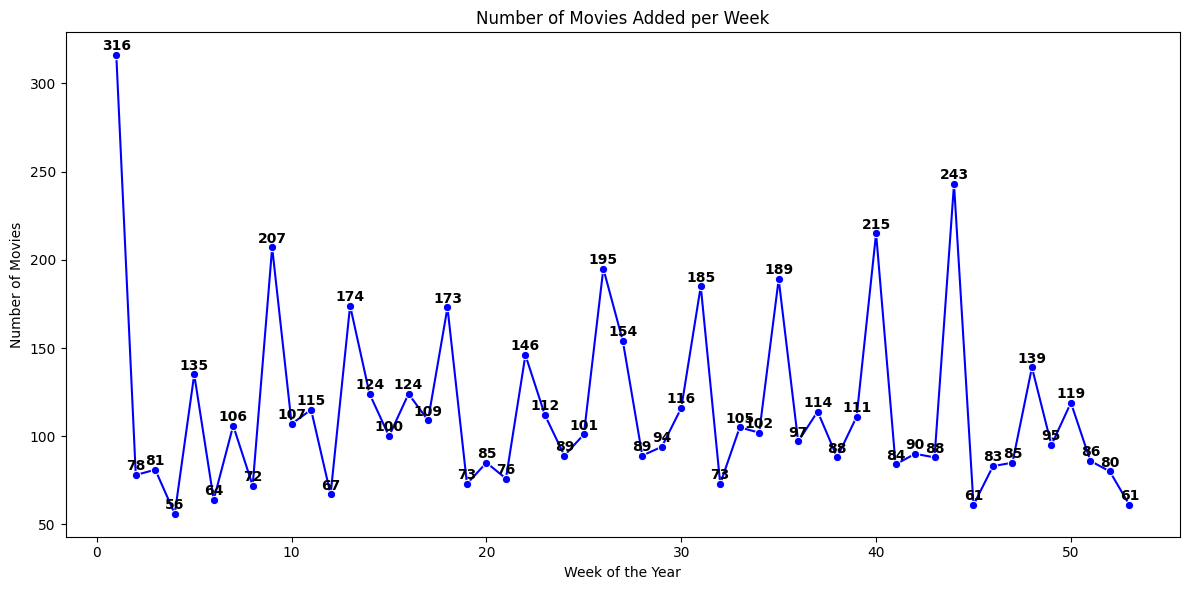

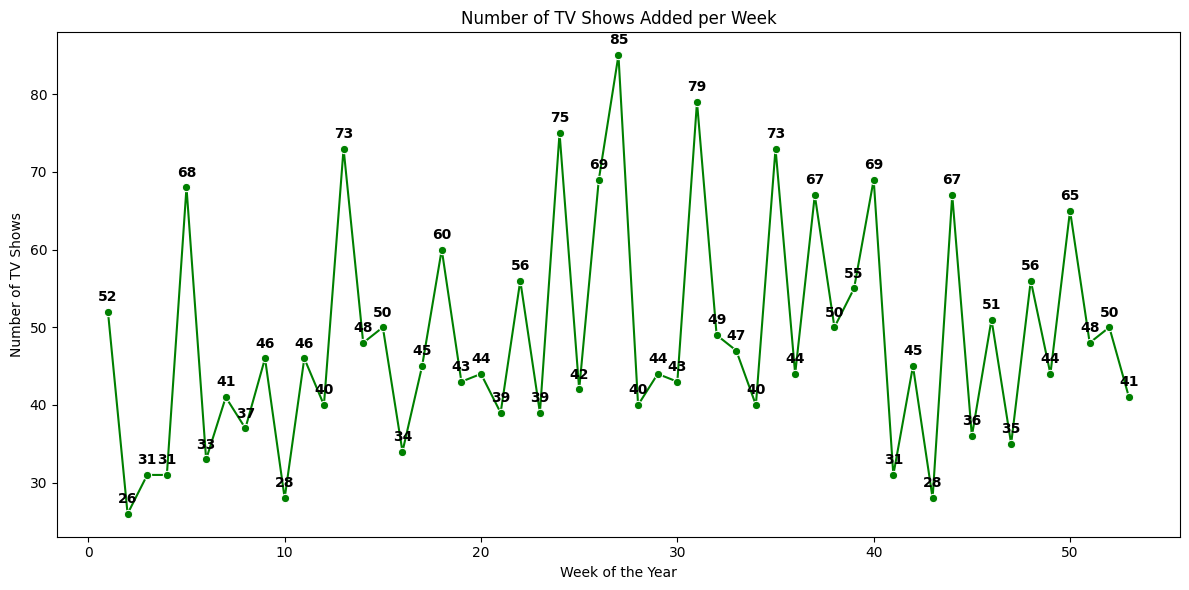

Top 5 weeks for Movies:
week_added
1     316
44    243
40    215
9     207
26    195
Name: title, dtype: int64

Top 5 weeks for TV Shows:
week_added
27    85
31    79
24    75
35    73
13    73
Name: title, dtype: int64


In [ ]:
#converting it to the date time format to easily extract the week data from it
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

data['week_added'] = data['date_added'].dt.isocalendar().week

movie_data = data[data['type'] == 'Movie']
tv_data = data[data['type'] == 'TV Show']

movie_weekly_release = movie_data.groupby('week_added')['title'].nunique().sort_values(ascending=False)

tv_weekly_release = tv_data.groupby('week_added')['title'].nunique().sort_values(ascending=False)

#plotting the chart using the movie_weekly_release data
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=movie_weekly_release.index, y=movie_weekly_release.values, marker='o', color='blue')
plt.title('Number of Movies Added per Week')
plt.xlabel('Week of the Year')
plt.ylabel('Number of Movies')
for i, v in enumerate(movie_weekly_release.values):
    ax.text(movie_weekly_release.index[i], v + 1, str(v), color='black', ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

#plotting the chart using the TV_weekly_release data
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=tv_weekly_release.index, y=tv_weekly_release.values, marker='o', color='green')
plt.title('Number of TV Shows Added per Week')
plt.xlabel('Week of the Year')
plt.ylabel('Number of TV Shows')
for i, v in enumerate(tv_weekly_release.values):
    ax.text(tv_weekly_release.index[i], v + 1, str(v), color='black', ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()


print(f"Top 5 weeks for Movies:\n{movie_weekly_release.head()}")
print(f"\nTop 5 weeks for TV Shows:\n{tv_weekly_release.head()}")


Insights:

**Movies:**
Highly volatile, ranging from 61 to 316.
Huge spike in Week 1 (316 movies), with other peaks in Weeks 9, 22, 40, 43.
Indicates bulk uploads, possibly tied to festive seasons or licensing cycles.

**TV Shows:**
Stable trend with weekly additions ranging from 28 to 85.
Peak in Week 28 (85 shows); steady moderate spikes throughout.
Likely weekly scheduled releases.

TV shows follow a consistent release pattern, while movies are added in large, irregular batches.



In [ ]:
tv_weekly_release.sum()

np.int64(2578)

In [ ]:
data[data['type'] == 'TV Show']['title'].nunique()

2676

In [ ]:
tv_data = data[data['type'] == 'TV Show']
missing_week_data = tv_data[tv_data['week_added'].isna()]
print(f"Number of TV shows without valid 'date_added': {missing_week_data['title'].nunique()}")

Number of TV shows without valid 'date_added': 98



1.  The total number of unique TV show titles in the dataset is 2676.
2.  This discrepancy of 98 titles occurs because:
We convert 'date_added' to datetime using `errors='coerce'`, which sets invalid/missing dates to NaT. As a result, these titles don't get a valid 'week_added' value and are excluded from the weekly groupby analysis
3. This is expected behavior — no data is lost; those entries are just excluded due to missing date information.




# **Top 10 Actors who have appeared in most Movies and TV shows**

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Total_mins,No_of_Seasons,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,0.0,38
1,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",0.0,2.0,38
2,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",0.0,2.0,38
3,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",0.0,2.0,38
4,s2,TV Show,Blood & Water,Unknown director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",0.0,2.0,38


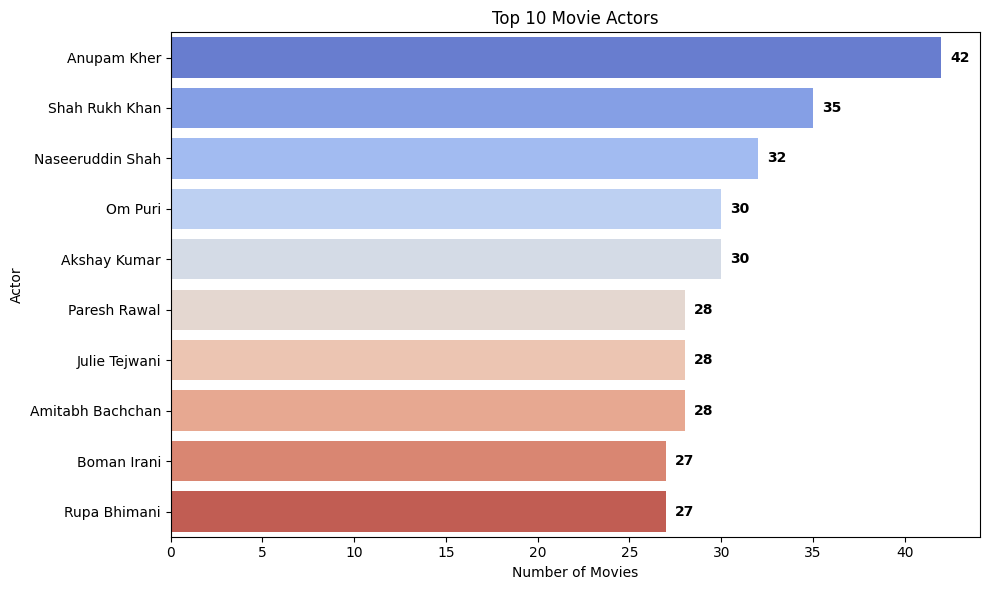

In [ ]:
#Top 10 Actors who have appeared in most Movies

movie_data = data[data['type'] == 'Movie']
movie_data_clean = movie_data[movie_data['cast'] != 'Unknown cast']

top_10_movie_actors = movie_data_clean.groupby('cast')['title'].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_10_movie_actors.values,y=top_10_movie_actors.index,hue=top_10_movie_actors.index,palette='coolwarm',legend=False)

for i, v in enumerate(top_10_movie_actors.values):
    ax.text(v + 0.5, i, str(v), color='black', va='center', fontweight='bold')

plt.title('Top 10 Movie Actors')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.tight_layout()
plt.show()


Insights:
Anupam Kher with 42 movies is the highest that the actor has casted in the Neflix movie's.
Followed by Shah Rukh Khan with 35 Movies and Rupa Bhimani has casted in 27 Movies and holding the 10th position in the list.

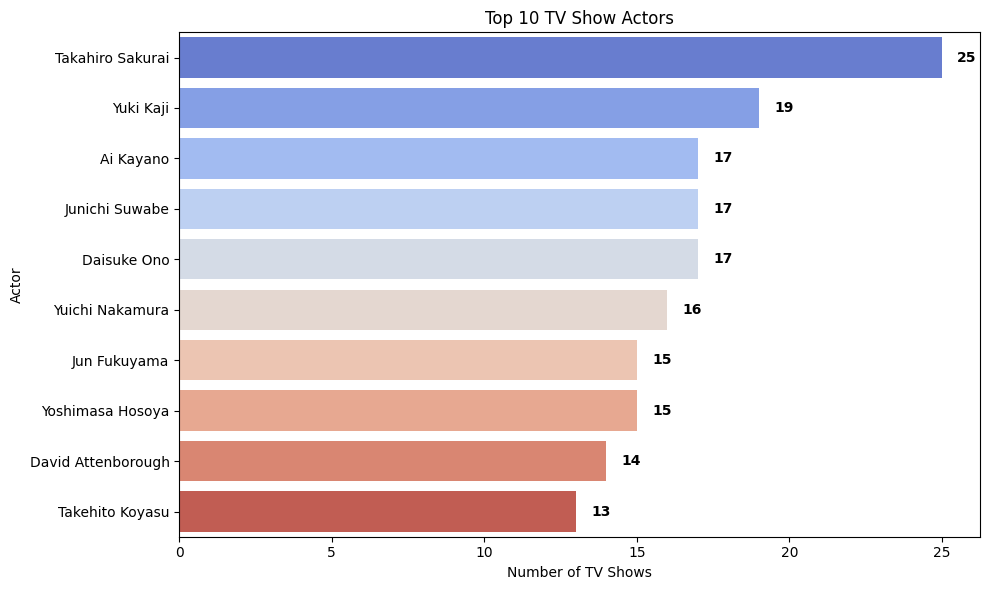

In [ ]:
# Top 10 Actors who have appeared in most TV shows

tv_data = data[data['type'] == 'TV Show']
tv_data_clean = tv_data[tv_data['cast'] != 'Unknown cast']

top_10_tv_actors = tv_data_clean.groupby('cast')['title'].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_10_tv_actors.values, y=top_10_tv_actors.index, hue=top_10_tv_actors.index, palette='coolwarm', legend=False)

for i, v in enumerate(top_10_tv_actors.values):
    ax.text(v + 0.5, i, str(v), color='black', va='center', fontweight='bold')

plt.title('Top 10 TV Show Actors')
plt.xlabel('Number of TV Shows')
plt.ylabel('Actor')
plt.tight_layout()
plt.show()

Insights:
Takahiro Sakurai with 25 TV Shows is the highest that the actor has casted in the Neflix TV Shows.
Followed by Yuki kaji with 19 TV Shows and Takehito Koyasu has casted in 13 TV Shows and holding the 10th position in the list.

# **Top 10 Directors who have appeared in most Movies and TV shows**

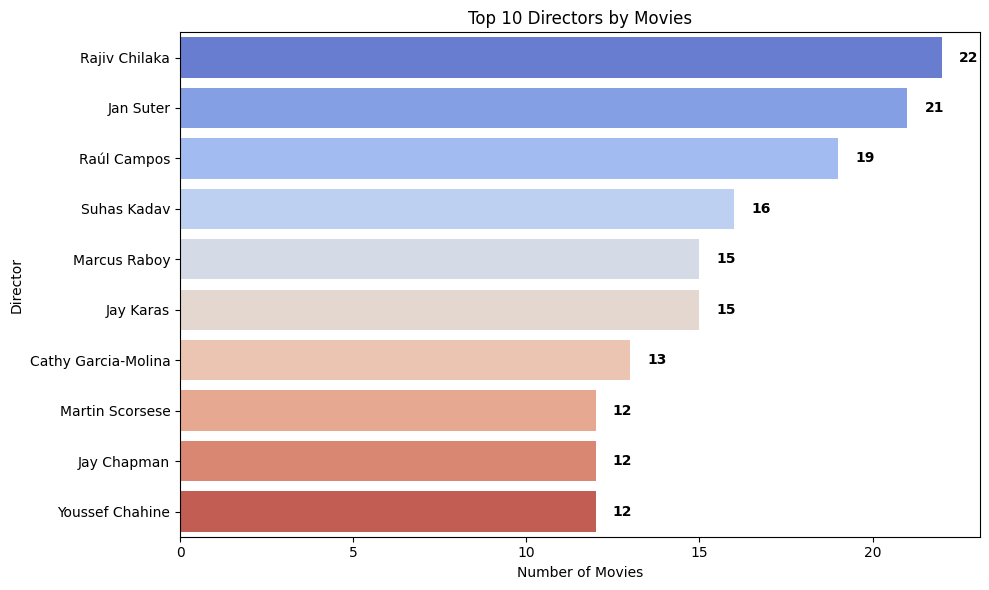

In [ ]:
# Top 10 Directors who have appeared in most Movies

movie_data = data[data['type'] == 'Movie']
data_clean_director = movie_data[movie_data['director'] != 'Unknown director']

top_10_directors = data_clean_director.groupby('director')['title'].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_10_directors.values, y=top_10_directors.index, hue=top_10_directors.index, palette='coolwarm', legend=False)

for i, v in enumerate(top_10_directors.values):
    ax.text(v + 0.5, i, str(v), color='black', va='center', fontweight='bold')

plt.title('Top 10 Directors by Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.tight_layout()
plt.show()


Insights:

Rajiv Chilaka with 22 movies is the highest among the directors listed in Netflix movies. He is followed closely by Jan Suter, who has directed 21 movies. Raúl Campos is in third place with 19 movies, showcasing a strong contribution to the film industry.

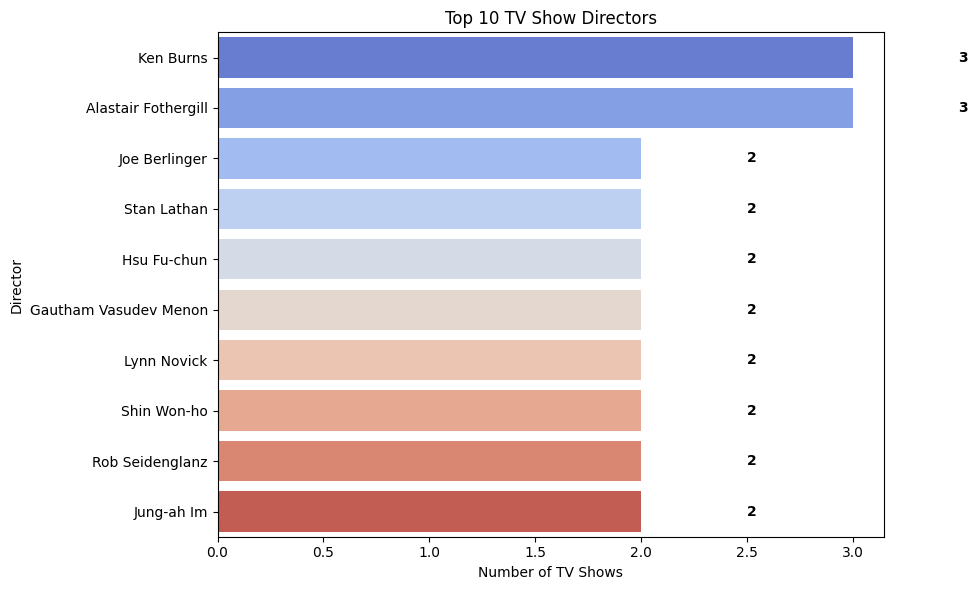

In [ ]:
# Top 10 Directors who have appeared in most TV shows

tv_data = data[data['type'] == 'TV Show']
tv_data_clean_director = tv_data[tv_data['director'] != 'Unknown director']

top_10_tv_directors = tv_data_clean_director.groupby('director')['title'].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_10_tv_directors.values, y=top_10_tv_directors.index, hue=top_10_tv_directors.index, palette='coolwarm', legend=False)

for i, v in enumerate(top_10_tv_directors.values):
    ax.text(v + 0.5, i, str(v), color='black', va='center', fontweight='bold')

plt.title('Top 10 TV Show Directors')
plt.xlabel('Number of TV Shows')
plt.ylabel('Director')
plt.tight_layout()
plt.show()


Insights:

Ken Burns and Alastair Fothergill are tied as the highest among TV show directors, each having directed 3 TV shows. They are followed by Joe Berlinger, Stan Lathan, Hsu Fu-chun, and Tham Vasudev Menon, all of whom have directed 2 TV shows, showcasing their significant contributions to television.

# **Genre Movies/TV shows that are popular and produced more**

In [ ]:
data


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Total_mins,No_of_Seasons,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,0.0,38
1,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",0.0,2.0,38
2,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",0.0,2.0,38
3,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",0.0,2.0,38
4,s2,TV Show,Blood & Water,Unknown director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",0.0,2.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,111.0,0.0,9
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,111.0,0.0,9
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,111.0,0.0,9
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,111.0,0.0,9


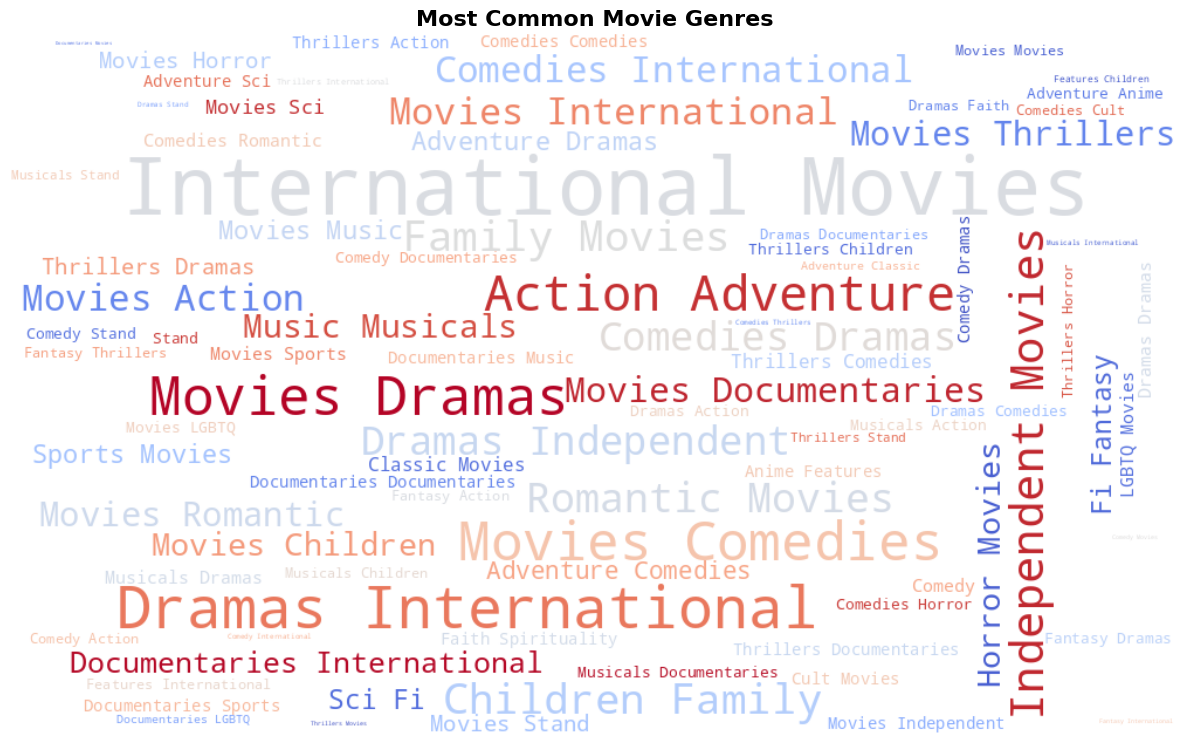

Top 10 Movie Genres:
International Movies: 2752
Dramas: 2427
Comedies: 1674
Documentaries: 869
Action & Adventure: 859
Independent Movies: 756
Children & Family Movies: 641
Romantic Movies: 616
Thrillers: 577
Music & Musicals: 375


In [ ]:
# Movies that are popular and produced more

from wordcloud import WordCloud, STOPWORDS
from collections import Counter

movie_data = data[data['type'] == 'Movie']

movie_genres_unique = movie_data[['show_id', 'listed_in']].drop_duplicates()

genre_text = ' '.join(movie_genres_unique['listed_in'].dropna().values)

wordcloud = WordCloud(
    width=1000,
    height=600,
    background_color='white',
    stopwords=STOPWORDS,
    colormap='coolwarm'
).generate(genre_text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Movie Genres', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

genre_list = [genre.strip() for item in movie_genres_unique['listed_in'].dropna() for genre in item.split(',')]
genre_counts = Counter(genre_list)

print("Top 10 Movie Genres:")
for genre, count in genre_counts.most_common(10):
    print(f"{genre}: {count}")


Insights:

Top 10 Movie Genres:
International Movies: 2752
Dramas: 2427
Comedies: 1674
Documentaries: 869
Action & Adventure: 859
Independent Movies: 756
Children & Family Movies: 641
Romantic Movies: 616
Thrillers: 577
Music & Musicals: 375

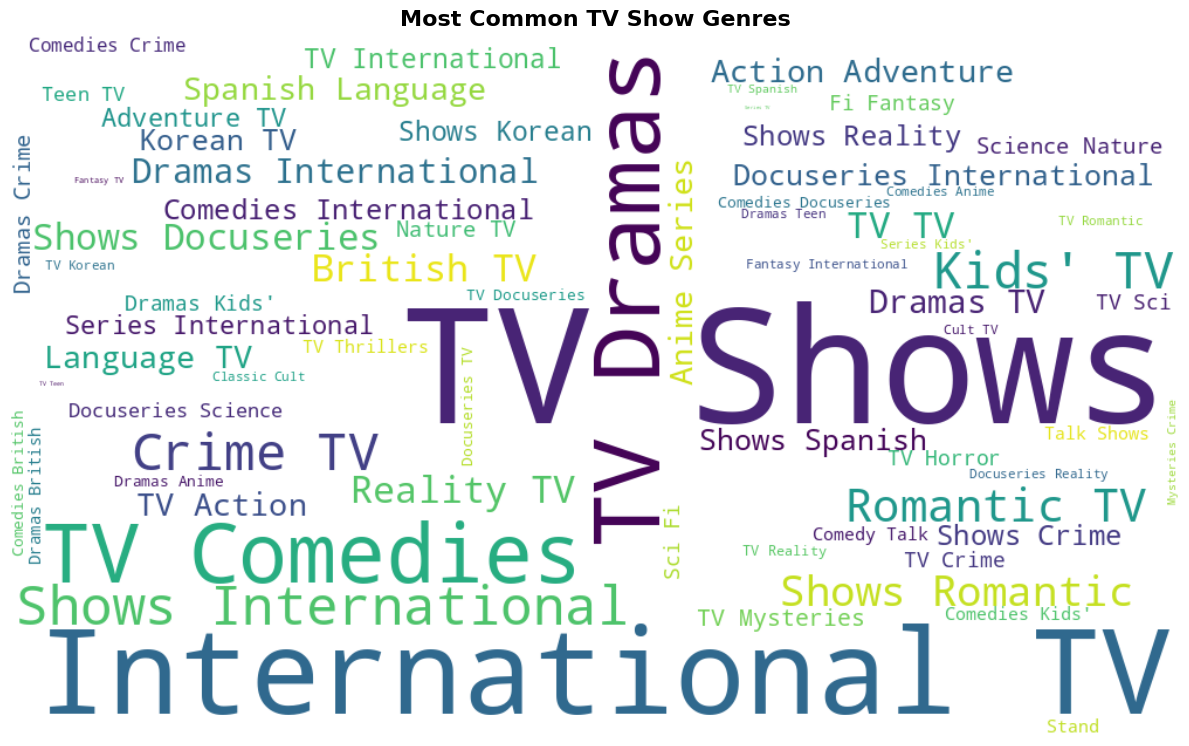

Top 10 TV Show Genres:
International TV Shows: 1351
TV Dramas: 763
TV Comedies: 581
Crime TV Shows: 470
Kids' TV: 451
Docuseries: 395
Romantic TV Shows: 370
Reality TV: 255
British TV Shows: 253
Anime Series: 176


In [ ]:
# TV Shows that are popular and produced more

tv_data = data[data['type'] == 'TV Show']

tv_genres_unique = tv_data[['show_id', 'listed_in']].drop_duplicates()

tv_genre_text = ' '.join(tv_genres_unique['listed_in'].dropna().values)

tv_wordcloud = WordCloud(
    width=1000,
    height=600,
    background_color='white',
    stopwords=STOPWORDS,
    colormap='viridis'
).generate(tv_genre_text)

plt.figure(figsize=(12, 8))
plt.imshow(tv_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common TV Show Genres', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

tv_genre_list = [genre.strip() for item in tv_genres_unique['listed_in'].dropna() for genre in item.split(',')]
tv_genre_counts = Counter(tv_genre_list)

print("Top 10 TV Show Genres:")
for genre, count in tv_genre_counts.most_common(10):
    print(f"{genre}: {count}")


Insights:

Top 10 TV Show Genres:
International TV Shows: 1351
TV Dramas: 763
TV Comedies: 581
Crime TV Shows: 470
Kids' TV: 451
Docuseries: 395
Romantic TV Shows: 370
Reality TV: 255
British TV Shows: 253
Anime Series: 176

In [ ]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Total_mins,No_of_Seasons,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,0.0,38
1,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",0.0,2.0,38
2,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",0.0,2.0,38
3,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",0.0,2.0,38
4,s2,TV Show,Blood & Water,Unknown director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",0.0,2.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,111.0,0.0,9
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,111.0,0.0,9
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,111.0,0.0,9
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,111.0,0.0,9


# **After how many days the movie will be added to Netflix after Movie Release (Considering recent past 5 years data)**

In [ ]:

from datetime import datetime

data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

# Getting the current year and calculating the cutoff year for the last 5 years
current_year = datetime.now().year
cutoff_year = current_year - 5

movie_data = data[(data['type'] == 'Movie') & (data['release_year'] >= cutoff_year)
][['show_id', 'release_year', 'date_added']].drop_duplicates().copy()

movie_data = movie_data.dropna(subset=['release_year', 'date_added'])

movie_data['release_date'] = pd.to_datetime(movie_data['release_year'].astype(int).astype(str) + '-01-01')

movie_data['days_to_add'] = (movie_data['date_added'] - movie_data['release_date']).dt.days

movie_data = movie_data[movie_data['days_to_add'] >= 0]

most_common_days = movie_data['days_to_add'].mode()[0]

print(f"Most Movies from the last 5 years are added to Netflix approximately {most_common_days} days after their release.\n")


Most Movies from the last 5 years are added to Netflix approximately 121 days after their release.



<ipython-input-367-4c97cb402224>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')


Insights:

Most Movies from the last 5 years are added to Netflix **approximately 121 days** after their release.

# **No of Movies and TV shows released year wise**

In [ ]:
data_unique = data.drop_duplicates(subset='title')
yearly_counts = data_unique.groupby(['release_year', 'type']).size().reset_index(name = 'count')
yearly_counts = yearly_counts.sort_values('release_year', ascending = False)

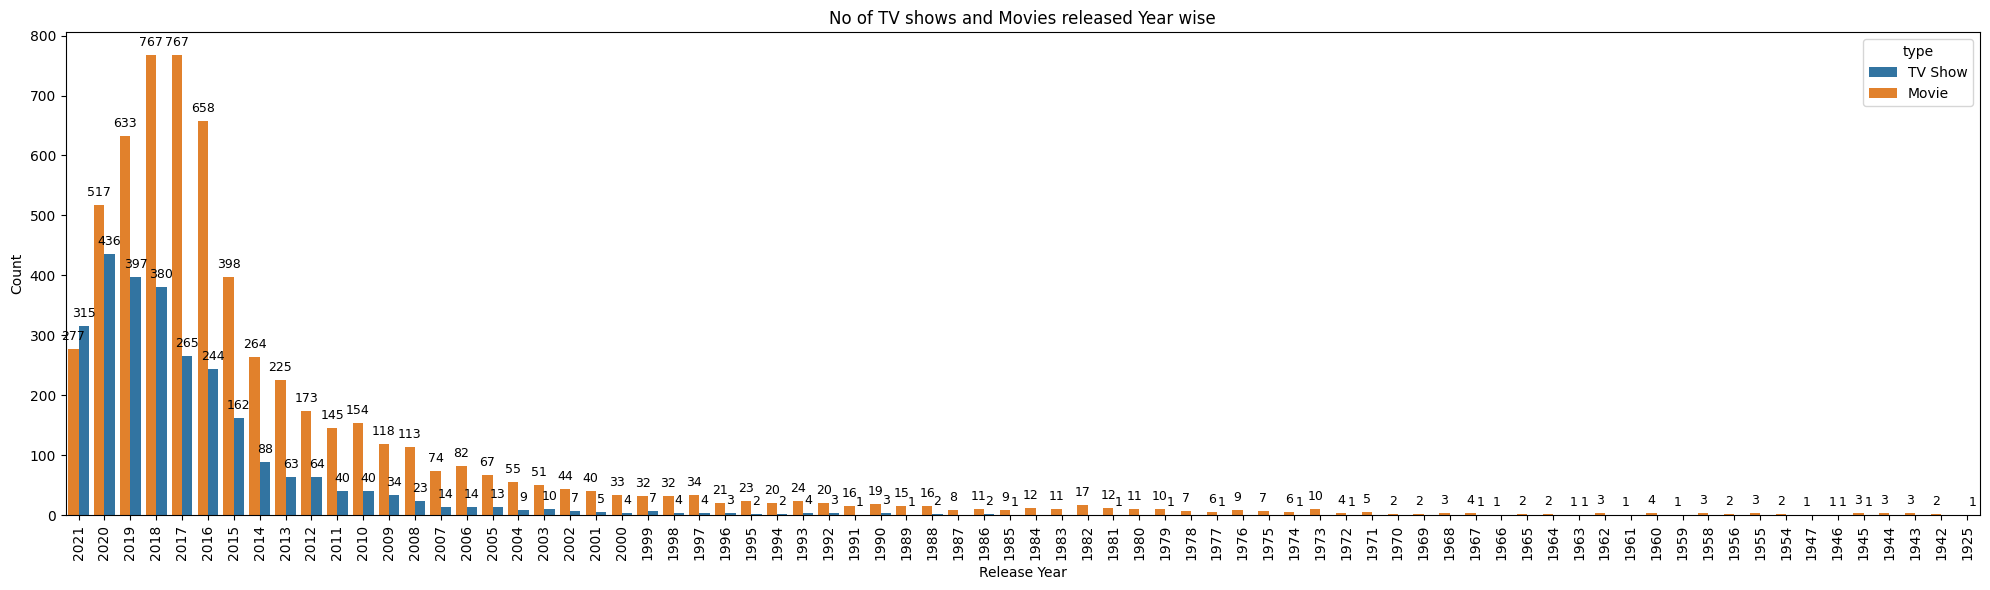

In [ ]:
plt.figure(figsize=(20, 6))
ax = sns.barplot(data = yearly_counts, x = 'release_year', y = 'count', hue = 'type')
for p in ax.patches:
  height = p.get_height()
  if height > 0:
      ax.text(
        p.get_x() + p.get_width() / 2,
        height + 10,
        int(height),
        ha = 'center',
        va = 'bottom',
        fontsize = 9
      )
plt.title("No of TV shows and Movies released Year wise")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.xticks(rotation = 90)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.savefig('Year_wise_Movies_TV_shows_Released.jpeg')

Insights:

1. No of movies production by netflix over the last 20 years has increased drastically over the period of time.
2. Even TV shows production by netflix were improved over the last 20 years.

3. But Compared to TV shows netflix has produced more Movies over the period of time.

## ## **Key Business Insights**

1. **Content Strategy:** Netflix currently produces more Movies than TV shows, but TV show growth has been consistent in recent years. The shift toward series is evident.

2. **Release Timing:** Week 1 is the peak for movie releases (new year/festival content). Week 27 is ideal for TV shows likely tied to mid-year content updates or summer breaks.

3. **Top Markets:** United States, India, and UK are the top content-producing countries. India ranks second place for movies, but 7th place for TV shows an opportunity area.

4. **Actor/Director Popularity:** For movies: Anupam Kher, Shah Rukh Khan, Martin Scorsese are frequent contributors. For TV: Takahiro Sakurai, Ken Burns lead are frequent contributors.

5. **Genres:** Movies Most common: Dramas, International Movies, Comedies, and Documentaries. TV Show Most common: specific hits include International TV, Crime, and Anime.

6. **Duration Patterns:** Most movies are in the duration of 90 - 120 mins. Most TV shows are only having 1 - 2 seasons, and currently it is showing a good consistency.

# ## **Recommendations**


1. **Investment in Limited-Series TV Shows:** The majority of Netflix's successful shows are 1 or 2 seasons, currently the TV shows are showing an good consistent performance indicating a strong viewer preference for TV Shows and a good scope of growth in this area.

2. **Boost Indian TV Show Production:** India ranks highly for movies contents but not for TV shows so expand the show production here to tap into a strong market.

3. **Leverage Popular Talent:** Collaboration with the top performing actors and directors (e.g., Anupam Kher, Martin Scorsese) to attract repeat viewership.

4. **Optimize Release Calendar:** Launch movies around Week 1 and Week 44 for a peak impact. Launch TV shows around Week 27 to 31 to align with viewing trends.

5. **Prioritize High-Demand Genres:** Focus on creating Dramas, Comedies, International stories, and Anime which is consistently among top-performing genres.

6. **Reducing Platform Movie Additional Delay:** Shorten the time between release and Netflix availability (currently ~120 days for many titles) to stay competitive with other platforms.